In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [146]:
csv_to_get = r'C:\Users\Tom\OneDrive\Documents\APROJECTS\agesStats.csv'

selected_year = 2011

def getCSV(csv, year):
    dfl = pd.read_csv(csv)
    year_df = dfl[dfl['CensusYear'] == year]
#     year_df['Single Year of Age'] = pd.to_numeric(year_df['Single Year of Age'], errors='coerce') #remove the 'all ages' values
#     year_df.dropna(subset=['Single Year of Age'])
    return year_df

df = getCSV(csv_to_get, selected_year)
print(df)

     Statistic Label  CensusYear         Sex  Single Year of Age  \
0         Population        2011  Both sexes            All ages   
1         Population        2011  Both sexes            All ages   
2         Population        2011  Both sexes            All ages   
3         Population        2011  Both sexes            All ages   
4         Population        2011  Both sexes            All ages   
...              ...         ...         ...                 ...   
9481      Population        2011      Female  100 years and over   
9482      Population        2011      Female  100 years and over   
9483      Population        2011      Female  100 years and over   
9484      Population        2011      Female  100 years and over   
9485      Population        2011      Female  100 years and over   

                County and City    UNIT    VALUE  
0                         State  Number  4588252  
1     Cork City and Cork County  Number   519032  
2                         Clar

In [147]:
def filterIntoAgeGroups():
    zero_to_eighteen = "0-18"
    nineteen_to_fortyfour = "19-44"
    fortyfive_to_sixtyfive = "45-65"
    sixtyfive_over = "65 <"
    age_dict = {zero_to_eighteen: 0,
                nineteen_to_fortyfour: 0,
                fortyfive_to_sixtyfive: 0,
                sixtyfive_over: 0,
                }
    filtered_df = df[(df['County and City'] == 'State') & (df['Sex'] == 'Both sexes')]
    
    for idx, row in filtered_df.iterrows():
        row_val = row['Single Year of Age']
        if row_val != "All ages":
            if len(row_val) == 6: #1
                row_val = row_val[:2]
                age_dict[zero_to_eighteen] += row['VALUE']
            elif 7<= len(row_val) < 8: #2-9
                row_val = row_val[:2]
                age_dict[zero_to_eighteen] += row['VALUE']
            elif 8<= len(row_val) < 9: #10-99 
                row_val = row_val[:2]
                if int(row_val) <= 18:
                    age_dict[zero_to_eighteen] += row['VALUE']
                elif 19 <= int(row_val) <= 44:
                    age_dict[nineteen_to_fortyfour] += row['VALUE']
                elif 45 <= int(row_val) <= 65:
                    age_dict[fortyfive_to_sixtyfive] += row['VALUE']
                else:
                    age_dict[sixtyfive_over] += row['VALUE']
            elif 9 <= len(row_val) < 18: # <1
                age_dict[zero_to_eighteen] += row['VALUE']
            else: #100<
                age_dict[sixtyfive_over] += row['VALUE']
    return age_dict
age_dict = filterIntoAgeGroups()

{'0-18': 1205527, '19-44': 1804453, '45-65': 1082713, '65 <': 495559}


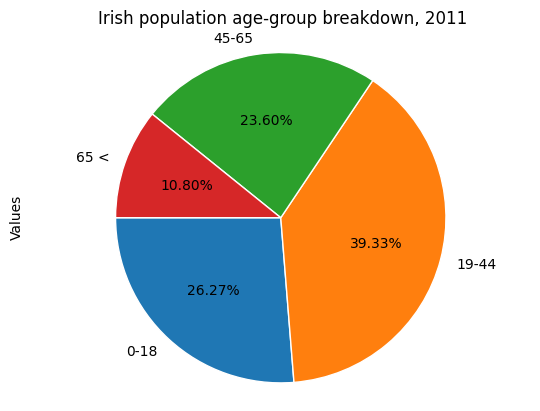

In [148]:
print(age_dict)

df = pd.DataFrame(list(age_dict.items()), columns=['Age Group', 'Values'])

df.plot.pie(y='Values', labels=df['Age Group'], autopct='%1.2f%%', startangle=180,wedgeprops=dict(width=1, edgecolor='w'), legend=False)
title_string = "Irish population age-group breakdown, " + str(selected_year) 
plt.title(title_string)
plt.axis('equal')

#plt.savefig('2022_AgeGroup_Breadown.png')

# Show the pie chart
plt.show()

In [155]:
selected_year = 2011

df = getCSV(csv_to_get, selected_year)

In [156]:
list_of_counties = []

for idx,row in df.iterrows():
    if row['County and City'] not in list_of_counties:
        list_of_counties.append(row['County and City'])
full_list = list_of_counties[1:]
list_of_counties = ["Kk " if s == "Kilkenny" else s[:3] for s in full_list]
print(list_of_counties)

['Cor', 'Cla', 'Cav', 'Car', 'Dub', 'Don', 'Dún', 'Fin', 'Gal', 'Gal', 'Kil', 'Kk ', 'Ker', 'Lon', 'Lou', 'Lim', 'Lei', 'Lao', 'Mea', 'Mon', 'May', 'Off', 'Ros', 'Sou', 'Sli', 'Tip', 'Wat', 'Wes', 'Wic', 'Wex']


In [157]:
male_df = df[(df['Sex'] == "Male") & (df['Single Year of Age'] == "All ages")]
female_df = df[(df['Sex'] == 'Female') & (df['Single Year of Age'] == "All ages")]    

male_list = male_df['VALUE'].tolist()[1:]
female_list = female_df['VALUE'].tolist()[1:]

In [158]:
index_dict = {"Counties": list_of_counties,
             "Males": male_list,
             "Females": female_list}
print(index_dict)

{'Counties': ['Cor', 'Cla', 'Cav', 'Car', 'Dub', 'Don', 'Dún', 'Fin', 'Gal', 'Gal', 'Kil', 'Kk ', 'Ker', 'Lon', 'Lou', 'Lim', 'Lei', 'Lao', 'Mea', 'Mon', 'May', 'Off', 'Ros', 'Sou', 'Sli', 'Tip', 'Wat', 'Wes', 'Wic', 'Wex'], 'Males': [257470, 58298, 37013, 27431, 257303, 80523, 98567, 134488, 36514, 88244, 104658, 47788, 72629, 19649, 60763, 95815, 16144, 40587, 91910, 30441, 65420, 38430, 32353, 129544, 32435, 79584, 56464, 42783, 67542, 71909], 'Females': [261562, 58898, 36170, 27181, 270309, 80614, 107694, 139503, 39015, 86880, 105654, 47631, 72873, 19351, 62134, 95994, 15654, 39972, 92225, 30042, 65218, 38257, 31712, 135661, 32958, 79170, 57331, 43381, 69098, 73411]}


In [159]:
def addUpGalway():
    index_county = list_of_counties.index('Gal')
    index_city = index_county+1
    
    county_total = male_list[index_county]
    city_total = male_list[index_city]
    galway_total_male = county_total + city_total
    
    county_total = female_list[index_county]
    city_total = female_list[index_city]
    galway_total_female = county_total + city_total
    
    return (galway_total_male, galway_total_female)
galway = addUpGalway()

index_dict['Counties'].insert(8, "Gal")
index_dict['Males'].insert(8, galway[0])
index_dict['Females'].insert(8, galway[1])

del index_dict['Counties'][9]
del index_dict['Males'][9]
del index_dict['Females'][9]
del index_dict['Counties'][9]
del index_dict['Males'][9]
del index_dict['Females'][9]

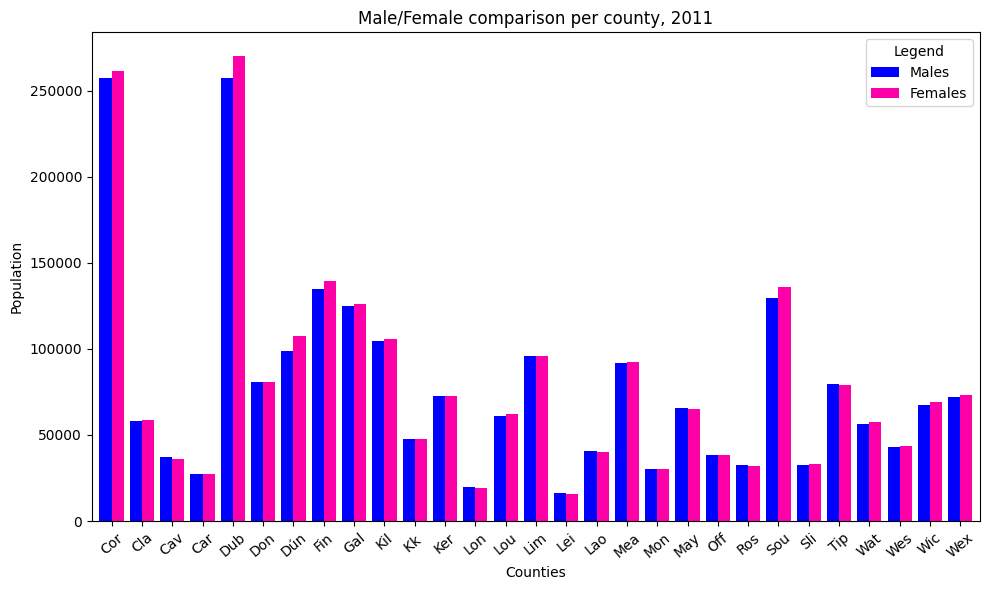

In [160]:
plot_df = pd.DataFrame(index_dict)

fig, ax = plt.subplots(figsize=(10, 6))

plot_df.plot(kind='bar', x='Counties', y=['Males', 'Females'], color=['blue', '#FE00A8'], width=0.8, ax=ax)

# Customize the plot
plt.title('Male/Female comparison per county, ' + str(selected_year))
plt.xlabel('Counties')
plt.xticks(rotation=40)
plt.ylabel('Population')
plt.tight_layout()
plt.legend(title='Legend', loc='upper right')

#plt.savefig('2011_Male_Female_County.png')

plt.show()

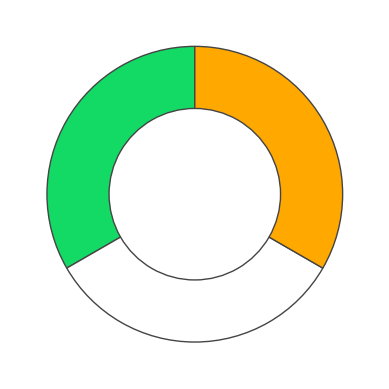

In [22]:

values = [3,3,3]
labels = ["","",""]
colors = ["#13DA64", "#FFFFFF", "#FFA800"]

plt.pie(values, labels=labels, startangle=90, colors=colors, wedgeprops=dict(edgecolor='#444444', width=0.42, linewidth=1))
plt.savefig("IrelandDonut.png")

plt.show()